# AULA 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dados_url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(dados_url, compression = 'zip')
import seaborn as sms

In [2]:
for i in range (len(dados.columns)):
    to_list = list(dados.columns[i])
    if (np.isin(to_list[1], '-')) ==  True:
        (to_list).remove('-')
        new_column = ''.join(to_list)
        dados.rename({dados.columns[i]:new_column}, axis=1, inplace=True)
        
        



In [3]:
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [5]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### TABELA DE FREQUÊNCIAS

In [8]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


### TABELA DE FREQUÊNCIAS COM A CLASSE TRATAMENTO INCLUSA

In [12]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

### TABELA COM VALORES NORMALIZADOS

In [14]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

# DESAFIO 1: CRIAR TABELA DE FREQUÊNCIAS COM pandas.groupy()

In [39]:
(dados.groupby(['dose','tempo','tratamento']).size())

dose  tempo  tratamento  
D1    24     com_controle     301
             com_droga       3585
      48     com_controle     343
             com_droga       4011
      72     com_controle     307
             com_droga       3600
D2    24     com_controle     305
             com_droga       3581
      48     com_controle     305
             com_droga       3591
      72     com_controle     305
             com_droga       3580
dtype: int64

# DESAFIO 2: NORMALIZAR A TABELA DO CROSSTAB PELA COLUNA

In [16]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### RESUMO DA TABELA ABAIXO: QUANDO EU RECEBI UMA DOSE PEQUENA NO GENE G0, MEDI DEPOIS DE 24H, A MINHA AMOSTRA COM CONTROLE TEM UM VALOR MÉDIO DE -0.25, A MINHA MÉDIA DE QUEM RECEBEU DROGA, TEM UM VALOR DE 0.36

In [41]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

# DESAFIO 3: EXPLORAR OUTROS AGREGADORES

# DESVIO PADRÃO

In [42]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

# MEDIANA

In [43]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

# DESAFIO 4: EXPLORAR O MELT

In [74]:
dados.melt(id_vars=['tempo', 'tratamento'], value_vars=['g0'], var_name='Gene', value_name = 'Manifestação')


,tempo,tratamento,Gene,Manifestação
0,24,com_droga,g0,1.0620
1,72,com_droga,g0,0.0743
2,48,com_droga,g0,0.6280
3,48,com_droga,g0,-0.5138
4,72,com_droga,g0,-0.3254
...,...,...,...,...
23809,24,com_droga,g0,0.1394
23810,24,com_droga,g0,-1.3260
23811,48,com_controle,g0,0.3942
23812,24,com_droga,g0,0.6660


In [48]:
 dados[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


<AxesSubplot:xlabel='g0', ylabel='g3'>

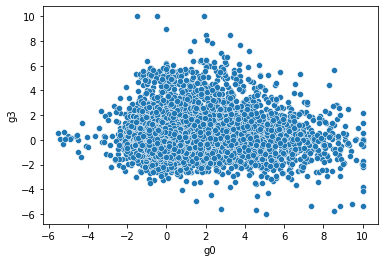

In [49]:
sms.scatterplot(x='g0', y = 'g3', data = dados)

In [50]:
 dados[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


### NO GRÁFICO ABAIXO, PERCEBE-SE QUE COM O AUMENTO DO g0, O g8 DIMINUI

<AxesSubplot:xlabel='g0', ylabel='g8'>

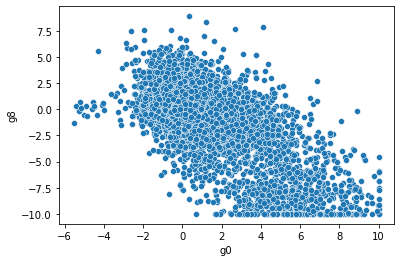

In [51]:
sms.scatterplot(x='g0', y = 'g8', data = dados)

# GRÁFICO DE DISPERSÃO COM UMA LINHA DE TENDÊNCIA

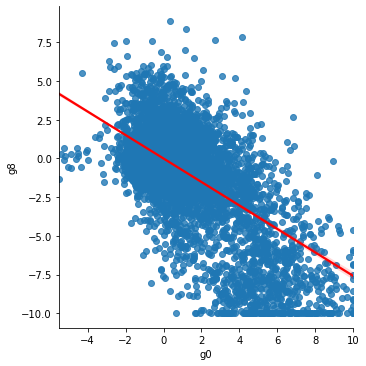

In [76]:
sms.lmplot(data=dados, x='g0', y = 'g8', line_kws = {'color': 'red'})

# EU DEDUZIRIA QUE CADA GENE TEM UMA MANIFESTAÇÃO DIFERENTE QUANDO INDIZUDISO A ALGUMA DOSAGEM DE DROGAS

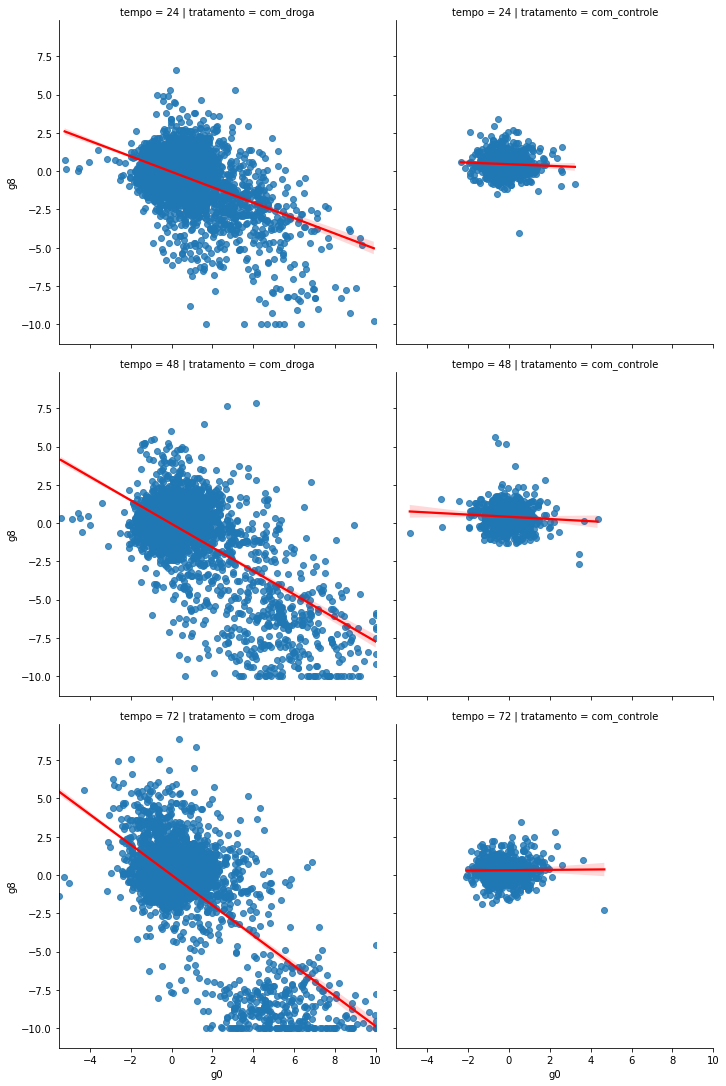

In [78]:
sms.lmplot(data=dados, x='g0', y = 'g8', line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

In [80]:
dados.loc[:, 'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


# CORRELAÇÕES PRÓXIMO DE 1 E -1, SIGNIFICA QUE ELAS ESTÃO MUITO RELACIONADAS ENTRE SI

# CORRELAÇÕES PRÓXIMO DE 0, SIGNIFICA QUE NÃO TEM TANTA RELAÇÃO ENTRE SI

# MAS O QUE DIFERENCIA VALORES POSITIVOS E NEGATIVOS? VALORES NEGATIVOS ESTÃO INVERSAMENTE CORRELACIONADOS, ENQUANTO OS POSITIVOS ESTÃO DIRETAMENTE CORRELACIONADOS

<AxesSubplot:>

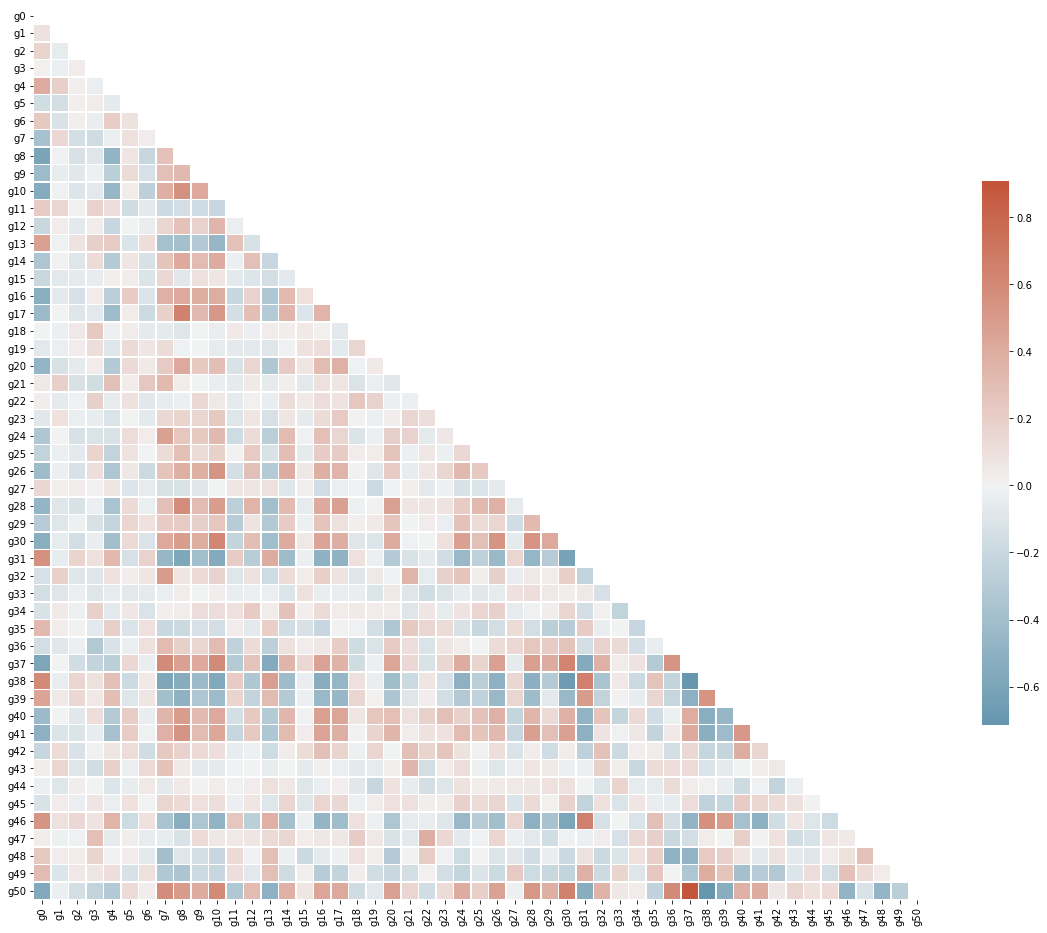

In [92]:
# Compute the correlation matrix
corr = dados.loc[:, 'g0':'g50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sms.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sms.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [99]:
# Compute the correlation matrix
corr_celular = dados.loc[:, 'c0':'c50'].corr()

<AxesSubplot:>

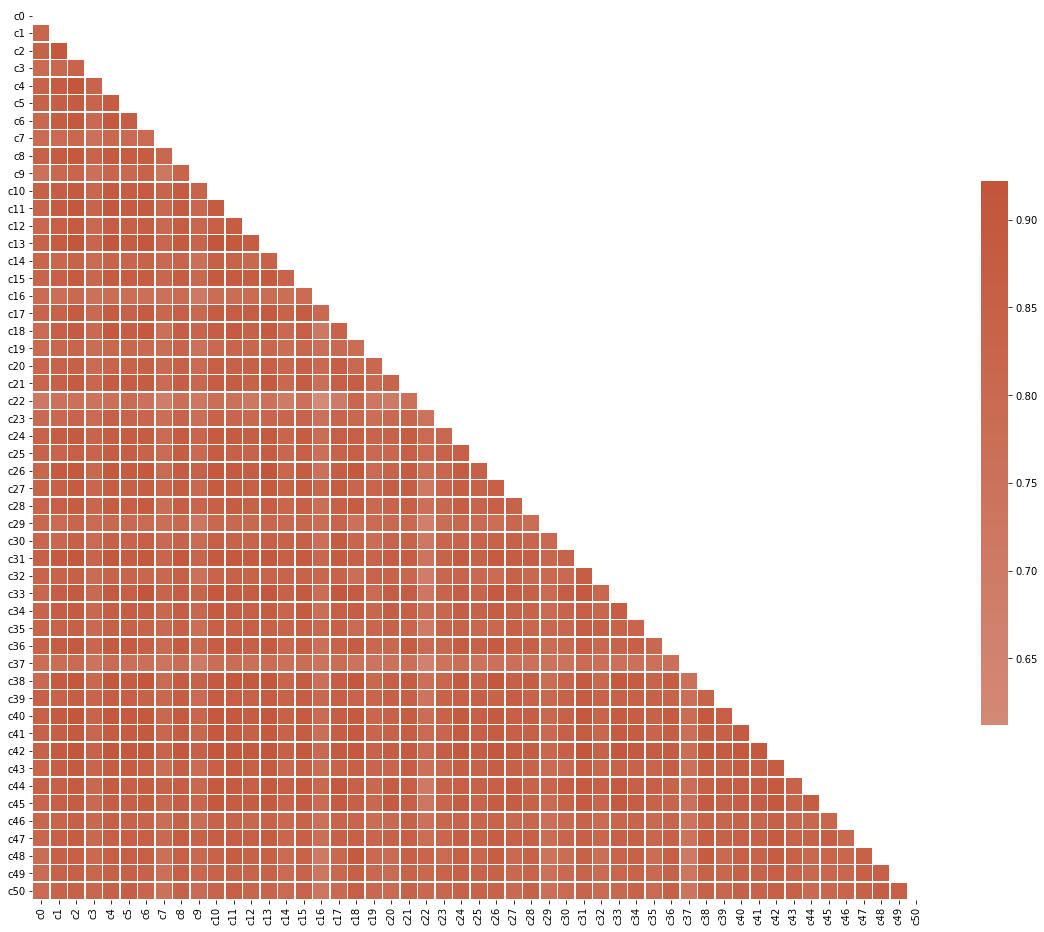

In [100]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular , dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sms.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sms.heatmap(corr_celular , mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# DESAFIO 5: CORRELACIONAR AS CÉLULAS COM OS GENES

In [133]:
gene1= 'g0'
ult_gene= 'g50'
cel1= 'c0'
ult_cel= 'c50'


In [134]:
gs = dados.loc[:,gene1:ult_gene]

In [135]:
cs = dados.loc[:, cel1:ult_cel]

In [136]:
result = gs.join(cs, how="outer")



In [139]:
corr_inicial = result.corr()

<AxesSubplot:>

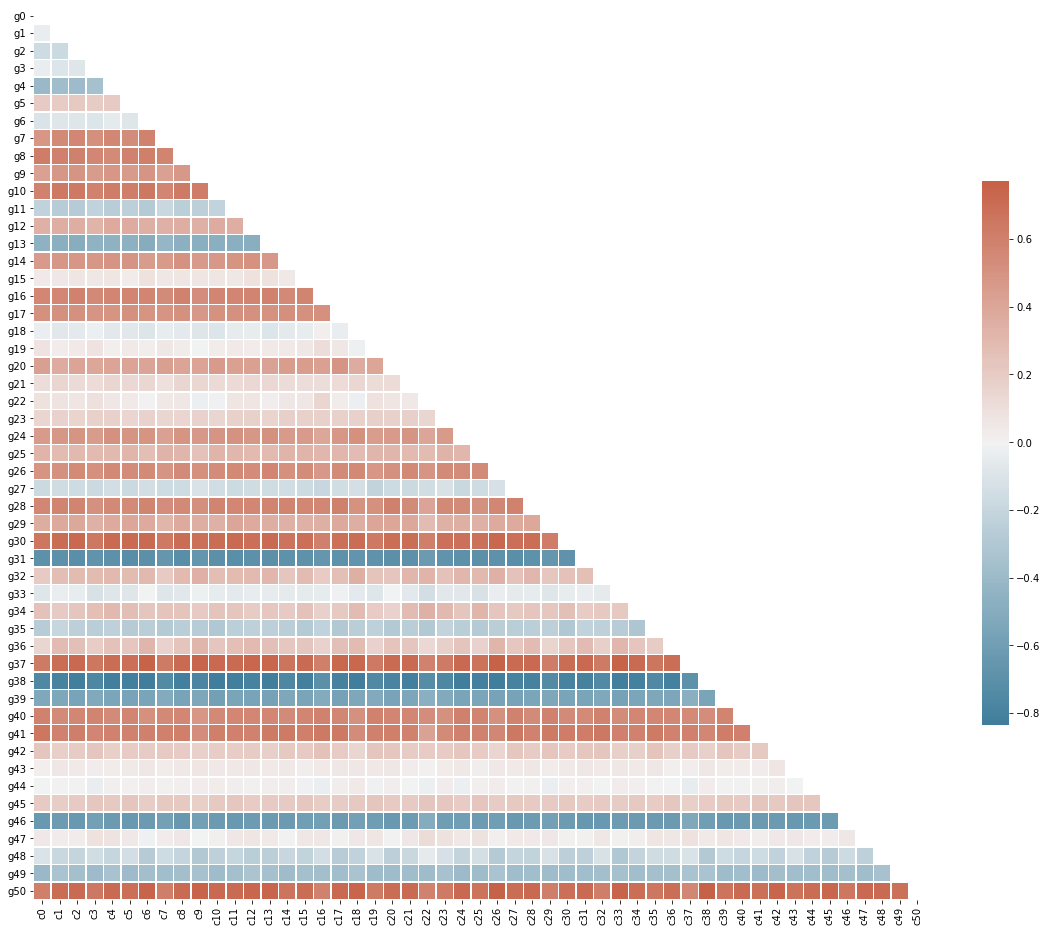

In [143]:
# Compute the correlation matrix
corr2 = corr_inicial.loc[gene1:ult_gene, cel1:ult_cel]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sms.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sms.heatmap(corr2, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
